In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import ast
# from curtsies.fmtfuncs import red, bold, green, on_blue, yellow

In [3]:
# read in rationales dataframe
rationales_df = pd.read_csv("./artifacts/RCNN_IB_GAN_be_mimic3_org_embs2021-05-12/batch_all_chosen_words.csv", index_col=0)
rationales_df.head()

,raw_sentence,chosen_words,words_not_chosen,predicted_label,true_label,proba,enq_seq_chosen,enq_seq_not_chosen
0,"['date', 'of', 'birth', 'sex', 'f', 'service',...","['UNK', 'haldol', 'bp', 'UNK', 'UNK', 'UNK', '...","['date', 'of', 'birth', 'sex', 'service', 'med...",0,1,0.446407,"[3, 1658, 94, 3, 3, 3, 3, 3, 3, 3, 8, 3, 3, 3,...","[115, 8, 438, 487, 211, 670, 146, 475, 278, 26..."
0,"['pneumonia', 'echo', 'the', 'left', 'atrium',...","['at', 'UNK', 'UNK', 'UNK', 'UNK', 'UNK', 'glu...","['pneumonia', 'echo', 'the', 'left', 'atrium',...",0,1,0.424603,"[19, 3, 3, 3, 3, 3, 149, 3, 238, 3, 526, 3, 58...","[335, 329, 5, 18, 126, 14, 21, 12, 82, 18, 44,..."
0,"['may', 'recommend', 'lisinopril', 'low', 'dos...","['may', 'recommend', 'lisinopril', 'dose', 'as...","['low', 'an', 'outpatient', 'follow', 'up', 'i...",0,1,0.380575,"[219, 1667, 696, 151, 22, 7, 3848, 3, 24, 442,...","[161, 70, 499, 121, 93, 12, 3, 1045, 9, 1050, ..."
0,"['should', 'develop', 'any', 'chest', 'pain', ...",['UNK'],"['should', 'develop', 'any', 'chest', 'pain', ...",0,1,0.453334,[3],"[342, 2306, 185, 81, 43, 557, 8, 275, 444, 613..."
0,"['date', 'of', 'birth', 'sex', 'f', 'service',...","['UNK', 'penicillins', 'with', 'solu', 'UNK', ...","['date', 'of', 'birth', 'sex', 'service', 'med...",1,1,0.599406,"[3, 1475, 9, 5506, 3, 3, 7, 2325, 3, 3, 3, 94,...","[115, 8, 438, 487, 211, 670, 146, 1460, 475, 2..."


In [4]:
# convert these weird strings of lists to lists
rationales_df['raw_sentence'] = rationales_df['raw_sentence'].apply(ast.literal_eval)
rationales_df['chosen_words'] = rationales_df['chosen_words'].apply(ast.literal_eval)
rationales_df['words_not_chosen'] = rationales_df['words_not_chosen'].apply(ast.literal_eval)
rationales_df['enq_seq_chosen'] = rationales_df['enq_seq_chosen'].apply(ast.literal_eval)
rationales_df['enq_seq_not_chosen'] = rationales_df['enq_seq_not_chosen'].apply(ast.literal_eval)

In [5]:
def detokenize(tokens):
    """Slightly cleaner version of joining with spaces.
    Args:
        tokens (list<string>): the sentence to print
    Return:
        str: the sentence
    """
    return ''.join([
        ' ' + t if not t.startswith('\'') and
                   t not in string.punctuation
        else t
        for t in tokens]).strip().capitalize()

In [6]:
def print_formatted_words(raw_sentence,chosen_words):
    
    
    '''
    Function to combine original raw sentences with the rationales/chosen words from model
    
    args: raw_sentence - tokenized list
          chosen_words - tokenized list
          
    returns:
            a detokenized string with colour formatting added to rationale/chosen words, embedded into raw text
    '''
    
    #get the set of chosen words - do not want repeats
    st = set(chosen_words)
    

#     t = rationales_df.iloc[2]['raw_sentence']
    
    #iterate over raw sentence and get index of words that appear in chosen words
    indices = [i for i, e in enumerate(raw_sentence) if e in st]
    # print(len(indices))
    # print(indices)

    #run back over raw sentence and colourise any chosen words, then reorganise into order of original sentence
    formatted_words = []
    bool_ints = []
    for i,word in enumerate(raw_sentence):
        if i in indices:
    #         print('\033[34m' + word + '\033[0m')
            formatted_words.append('\033[34m' + word + '\033[0m')
            bool_ints.append(1)

        else:
    #         print(word)
            formatted_words.append(word)
            bool_ints.append(0)
    
    formatted_sentence = detokenize(formatted_words)

    
#     print(f"original sentence:\n{detokenize(raw_sentence)}")
#     print("\n =====================================================================================================\n")          
    print(formatted_sentence)
#     return bool_ints
    
#     return formatted_sentence





In [7]:
def get_case(row):
    if (row["true_label"]==0) & (row["predicted_label"]==1):
        print("got a false positive")
        return "False-Positive"
    elif (row["true_label"]==0) & (row["predicted_label"]==0):
        print("got a true negative")
        return "True-Negative"
    elif (row["true_label"]==1) & (row["predicted_label"]==1):
        print("got a true positive")
        return "True-Positive"
    elif (row["true_label"]==1) & (row["predicted_label"]==0):
        print("got a flase negative")
        return "False-Negative"
    

In [8]:
def get_case_binary(row):
    if (row["true_label"]==0) & (row["predicted_label"]==1):
        print("got a false positive")
        return "Positive"
    elif (row["true_label"]==0) & (row["predicted_label"]==0):
        print("got a true negative")
        return "Negative"
    elif (row["true_label"]==1) & (row["predicted_label"]==1):
        print("got a true positive")
        return "Positive"
    elif (row["true_label"]==1) & (row["predicted_label"]==0):
        print("got a flase negative")
        return "Negative"

In [9]:
rationales_df["case"] = rationales_df.apply (lambda row: get_case(row), axis=1)
rationales_df["binary_case"] = rationales_df.apply (lambda row: get_case_binary(row), axis=1)

got a flase negative
got a flase negative
got a flase negative
got a flase negative
got a true positive
got a true positive
got a flase negative
got a flase negative
got a true positive
got a true positive
got a true positive
got a flase negative
got a flase negative
got a true positive
got a true positive
got a true positive
got a flase negative
got a flase negative
got a true positive
got a flase negative
got a true positive
got a flase negative
got a true positive
got a flase negative
got a flase negative
got a true positive
got a true positive
got a true positive
got a true positive
got a true positive
got a true positive
got a true positive
got a true positive
got a true positive
got a true positive
got a true positive
got a flase negative
got a flase negative
got a flase negative
got a flase negative
got a flase negative
got a flase negative
got a true negative
got a true negative
got a true negative
got a false positive
got a false positive
got a true negative
got a false positi

got a false positive
got a true negative
got a false positive
got a true negative
got a true negative
got a true negative
got a true negative
got a true negative
got a true positive
got a flase negative
got a true positive
got a true positive
got a true positive
got a flase negative
got a true positive
got a true negative
got a true negative
got a true negative
got a false positive
got a true negative
got a false positive
got a true negative
got a true positive
got a flase negative
got a flase negative
got a flase negative
got a flase negative
got a true positive
got a true positive
got a true positive
got a true positive
got a flase negative
got a true positive
got a true positive
got a true negative
got a true negative
got a true negative
got a true negative
got a flase negative
got a flase negative
got a flase negative
got a flase negative
got a true positive
got a flase negative
got a flase negative
got a flase negative
got a flase negative
got a true positive
got a flase negative


got a flase negative
got a flase negative
got a flase negative
got a true positive
got a true positive
got a true negative
got a true negative
got a true negative
got a false positive
got a false positive
got a true negative
got a false positive
got a false positive
got a true negative
got a true negative
got a true negative
got a true negative
got a false positive
got a true negative
got a true negative
got a flase negative
got a flase negative
got a flase negative
got a true negative
got a true negative
got a true negative
got a true negative
got a true negative
got a false positive
got a false positive
got a true negative
got a true negative
got a true negative
got a true negative
got a true negative
got a true negative
got a flase negative
got a flase negative
got a true negative
got a false positive
got a true negative
got a flase negative
got a true positive
got a flase negative
got a true positive
got a true positive
got a true positive
got a true positive
got a true positive
go

got a true negative
got a true negative
got a true negative
got a true negative
got a true negative
got a true negative
got a true negative
got a false positive
got a true negative
got a true negative
got a flase negative
got a true positive
got a true positive
got a flase negative
got a flase negative
got a flase negative
got a flase negative
got a true positive
got a flase negative
got a true positive
got a true positive
got a flase negative
got a flase negative
got a flase negative
got a flase negative
got a true positive
got a true positive
got a flase negative
got a true negative
got a true negative
got a true negative
got a false positive
got a true negative
got a false positive
got a true negative
got a false positive
got a true negative
got a false positive
got a true negative
got a true negative
got a true negative
got a true negative
got a true negative
got a true negative
got a true negative
got a false positive
got a true negative
got a false positive
got a false positive
g

In [1]:
rationales_df.head()

NameError: name 'rationales_df' is not defined

In [170]:
# print_formatted_words(rationales_df.iloc[2]['raw_sentence'], rationales_df.iloc[2]['chosen_words'])

## False Positive formatted example - Gets a random sample from dataframe

In [165]:
# false positive - pred 1 true 0 - get random sample
fp_df = rationales_df[(rationales_df["true_label"]==0) & (rationales_df["predicted_label"]==1)].sample().squeeze(axis = 0)


print_formatted_words(fp_df['raw_sentence'], fp_df['chosen_words'])

original sentence:
Duration of his stay medications on admission flexeril neurontin insulin discharge medications lactulose 10 gram 15 ml syrup sig forty five 45 ml po tid 3 times a day rifaximin 200 mg tablet sig two 2 tablet po tid 3 times a day thiamine hcl 100 mg tablet sig one 1 tablet po daily daily folic acid 1 mg tablet sig one 1 tablet po daily daily multivitamin tablet sig one 1 tablet po daily daily insulin lispro 100 unit ml solution sig according to sliding scale subcutaneous asdir as directed spironolactone 25 mg tablet sig two 2 tablet po daily daily furosemide 40 mg tablet sig one 1 tablet po daily daily pantoprazole 40 mg recon soln sig one 1 recon soln intravenous q12h every 12 hours discharge disposition extended care discharge diagnosis primary esophageal variceal bleed hepatic encephalopathy alcoholic hcv cirrhosis secondary alcoholism diabetes mellitus discharge condition mental status confused sometimes has not been able to state date correctly but oriented to pe

In [90]:
rationales_df[(rationales_df["true_label"]==0) & (rationales_df["predicted_label"]==1)]

,raw_sentence,chosen_words,words_not_chosen,predicted_label,true_label,proba,enq_seq_chosen,enq_seq_not_chosen
0,"[date, date, of, birth, sex, f, service, medic...","[UNK, allergies, cephalosporins, vancomycin, U...","[date, date, of, birth, sex, service, medicine...",1,0,0.597924,"[3, 146, 4860, 365, 3, 3, 3, 3, 19, 3, 7, 7, 1...","[115, 115, 8, 438, 487, 211, 670, 2273, 475, 2..."
0,"[complained, of, feeling, poorly, and, endorse...","[to, chronic, opioids, including, methadone, U...","[complained, of, feeling, poorly, and, endorse...",1,0,0.696791,"[7, 162, 7606, 519, 1968, 3, 889, 3, 3, 3, 3, ...","[2212, 8, 1448, 2675, 6, 6373, 314, 1949, 6560..."
0,"[within, normal, limits, her, systolic, blood,...","[UNK, iv, UNK, UNK, UNK, UNK, vancomycin, with...","[within, normal, limits, her, systolic, blood,...",1,0,0.507378,"[3, 106, 3, 3, 3, 3, 365, 9, 3, 9, 365, 3, 3, ...","[388, 21, 1054, 48, 75, 30, 158, 2341, 7, 5, 3..."
0,"[to, have, her, blood, pressure, medications, ...","[as, regimen, of, methadone, UNK, mg, qid, oxy...","[to, have, her, blood, pressure, medications, ...",1,0,0.647565,"[22, 683, 8, 1968, 3, 16, 1221, 889, 78, 237, ...","[7, 73, 48, 30, 158, 65, 12010, 70, 499, 162, ..."
0,"[lock, 2, hour, dwell, time, each, lumen, repe...","[lock, UNK, each, lumen, repeated, every, UNK,...","[hour, dwell, time, day, day, mouth, times, da...",1,0,0.565507,"[7071, 3, 1771, 1069, 2456, 204, 3, 69, 5993, ...","[281, 8201, 74, 36, 36, 484, 140, 36, 1166, 48..."
...,...,...,...,...,...,...,...,...
0,"[on, a, diltiazem, drip, with, good, control, ...","[on, UNK, diltiazem, on, po, metoprolol, UNK, ...","[drip, with, good, control, of, heart, rate, a...",1,0,0.549961,"[13, 3, 1346, 13, 24, 397, 3, 3, 263, 13, 397,...","[656, 9, 296, 237, 8, 114, 157, 6, 5, 17, 10, ..."
0,"[moved, should, wear, j, collar, until, that, ...","[should, UNK, on, warfarin, please, monitor, i...","[moved, wear, collar, until, that, time, patie...",1,0,0.544930,"[342, 3, 13, 1204, 176, 230, 154, 37, 6, 2734,...","[3305, 3407, 1797, 425, 67, 74, 17, 857, 506, ..."
0,"[methadone, 10, mg, tablet, sig, two, 2, table...","[methadone, UNK, mg, tablet, sig, two, UNK, ta...","[day, day, day, bedtime, hours, day, needed, d...",1,0,0.585320,"[1968, 3, 16, 27, 50, 196, 3, 27, 24, 396, 140...","[36, 36, 36, 955, 91, 36, 159, 36, 159, 91, 22..."
0,"[the, following, changes, to, your, medication...","[stopped, carvedilol, coreg, stopped, lisinopr...","[the, following, changes, to, your, medication...",1,0,0.506943,"[826, 2320, 3968, 826, 696, 643, 1861, 151, 27...","[5, 280, 111, 7, 97, 65, 643, 130, 19485, 114,..."


## get best false positive

In [111]:
print("Example of rationale production - best false positive case\n")
best_id = rationales_df[(rationales_df["true_label"]==0) & (rationales_df["predicted_label"]==1)]['proba'].argmax()
fp_df_best = rationales_df[(rationales_df["true_label"]==0) & (rationales_df["predicted_label"]==1)].iloc[best_id]
print("probability of class prediction: ", fp_df_best["proba"])
print("=====================================================================================================================")

print_formatted_words(fp_df_best['raw_sentence'], fp_df_best['chosen_words'])

Example of rationale production - best false positive case

probability of class prediction:  0.7985506
Linezolid in the micu with improvement in his clinical status platics did not feel that his ulcers were infected on transfer to the floor the patient s linezolid was discontinued and his zosyn was continued follow up cultures were negative recurrent fevers pt began spiking temps up to 103 even though uti has resolved ct pelvis was performed and showed osteo specifically increased osteo comp to in much of pelvis ischial tuberocity inf pubic rami also new soft tissue ulcers and l hip effusion in close proximity w sq infection consulted ortho for washout and l hip tap consulted id no involvement of spine on the scan daily survailence cxs showed no growth s p ir guided tap of l hip cxs negative so no urgency for immediate washout came up with the following plan d c pt on abxs flagyl and cefpodoxime plan splastics surgery on by doctor pt will also be seen in clinic decubitus ulcers the pa

## False Negative formatted example - Gets a random sample from dataframe

In [93]:
# false negative - pred 0 true 1

fn_df = rationales_df[(rationales_df["true_label"]==1) & (rationales_df["predicted_label"]==0)].sample().squeeze(axis = 0)


print_formatted_words(fn_df['raw_sentence'], fn_df['chosen_words'])

original sentence:
Through the biliary system tracer activity is noted in the small bowel at 7 minutes there is no visualization of the gallbladder during 60 minutes at 60 minutes 2 mg of morphine was administered iv and additional imaging was performed the gallbladder was still not visualized the above findings are consistent with cystic duct obstruction most likely secondary to acute cholecystitis impression non visualization of the gallbladder initially and after administration of morphine is compatible with acute cholecystitis radiology report liver or gallbladder us study date of comparisons ct abdomen and pelvis findings examination limited by body habitus the liver demonstrates no focal gross masses or intrahepatic ductal dilatation the gallbladder is mildly distended with slightly thickened wall and questionable edema trace pericholecystic fluid small non shadowing gallstones are seen within the gallbladder negative son sign patient did report diffuse epigastric pain during the

## get best false negative 

In [112]:
# get best id by using arg min - the lowest probability of class 1 essentially
print("Example of rationale production - worst false negative case\n")
best_id = rationales_df[(rationales_df["true_label"]==1) & (rationales_df["predicted_label"]==0)]['proba'].argmin()

fn_df_best = rationales_df[(rationales_df["true_label"]==1) & (rationales_df["predicted_label"]==0)].iloc[best_id]
print("probability of class prediction: ",fn_df_best['proba'])
print("=====================================================================================================")


print_formatted_words(fn_df_best['raw_sentence'], fn_df_best['chosen_words'])


Example of rationale production - worst false negative case

probability of class prediction:  0.18742073
oil sig 15 30 mls po qd disp 1 bottle refills 2 pantoprazole 40 mg tablet delayed release e c sig one 1 tablet delayed release e c po once a day disp 30 tablet delayed release e c s refills 2 diovan 160 mg tablet sig one 1 tablet po once a day disp 30 tablet s refills 2 discharge disposition home discharge diagnosis primary diagnoses gi bleed acute blood loss anemia secondary diagnoses danlos syndrome type 4 htn discharge condition stable hct stable x 24 hours discharge instructions please do not take your toprol xl until you follow up with doctor for a blood pressure check at that time you will also need your hct checked to make sure you are not bleeding again avoid all nsaids motrin aleve ibuprofen etc eat only a soft solid diet continue to take mineral oils you will need to follow up with doctor surgery in weeks the phone number is please make sure you see doctor in weeks for he

In [96]:
rationales_df[(rationales_df["true_label"]==1) & (rationales_df["predicted_label"]==0)]

,raw_sentence,chosen_words,words_not_chosen,predicted_label,true_label,proba,enq_seq_chosen,enq_seq_not_chosen
0,"[date, of, birth, sex, f, service, medicine, a...","[UNK, haldol, bp, UNK, UNK, UNK, UNK, UNK, UNK...","[date, of, birth, sex, service, medicine, alle...",0,1,0.446407,"[3, 1658, 94, 3, 3, 3, 3, 3, 3, 3, 8, 3, 3, 3,...","[115, 8, 438, 487, 211, 670, 146, 475, 278, 26..."
0,"[pneumonia, echo, the, left, atrium, is, norma...","[at, UNK, UNK, UNK, UNK, UNK, glucose, UNK, so...","[pneumonia, echo, the, left, atrium, is, norma...",0,1,0.424603,"[19, 3, 3, 3, 3, 3, 149, 3, 238, 3, 526, 3, 58...","[335, 329, 5, 18, 126, 14, 21, 12, 82, 18, 44,..."
0,"[may, recommend, lisinopril, low, dose, as, an...","[may, recommend, lisinopril, dose, as, to, aug...","[low, an, outpatient, follow, up, in, UNK, mon...",0,1,0.380575,"[219, 1667, 696, 151, 22, 7, 3848, 3, 24, 442,...","[161, 70, 499, 121, 93, 12, 3, 1045, 9, 1050, ..."
0,"[should, develop, any, chest, pain, shortness,...",[UNK],"[should, develop, any, chest, pain, shortness,...",0,1,0.453334,[3],"[342, 2306, 185, 81, 43, 557, 8, 275, 444, 613..."
0,"[bp, 187, 120, hr, 77, rr, 17, sat, 100, on, r...","[bp, UNK, UNK, UNK, UNK, UNK, UNK, UNK, UNK, U...","[hr, rr, sat, UNK, on, ra, gen, nad, heent, pe...",0,1,0.357610,"[94, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 94...","[69, 174, 601, 3, 13, 315, 954, 990, 494, 6348..."
...,...,...,...,...,...,...,...,...
0,"[to, the, hospital, with, multiple, injuries, ...","[to, will, for, UNK, UNK, UNK]","[to, the, hospital, with, multiple, injuries, ...",0,1,0.426431,"[7, 78, 15, 3, 3, 3]","[7, 5, 138, 9, 336, 3069, 112, 97, 1515, 3896,..."
0,"[date, of, birth, sex, m, service, cardiothora...","[UNK, UNK, UNK, UNK, UNK, UNK, UNK, UNK, UNK, ...","[date, of, birth, sex, service, cardiothoracic...",0,1,0.349250,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[115, 8, 438, 487, 211, 1765, 146, 11, 310, 14..."
0,"[creat, 5, na, 137, k, 8, cl, 98, hco3, 30, an...","[UNK, UNK, UNK, UNK, cl, UNK, UNK, UNK, UNK, U...","[creat, na, angap, blood, alt, ast, alkphos, t...",0,1,0.399647,"[3, 3, 3, 3, 460, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]","[352, 361, 580, 30, 440, 437, 1266, 1258, 3, 3..."
0,"[for, his, cardiomyopathy, and, the, torsemide...","[UNK, will, on, admission, losartan, UNK, mg, ...","[for, his, cardiomyopathy, and, the, torsemide...",0,1,0.469592,"[3, 78, 13, 68, 3616, 3, 16, 37, 397, 2510, 3,...","[15, 41, 1535, 6, 5, 3820, 26, 10, 13, 19, 107..."


In [97]:
rationales_df[(rationales_df["true_label"]==1) & (rationales_df["predicted_label"]==0)]['predicted_label'].argmax()

0

## True positive -  gets random sample from dataframe

In [98]:
# true positive - pred 1 true 1
tp_df = rationales_df[(rationales_df["true_label"]==1) & (rationales_df["predicted_label"]==1)].sample().squeeze(axis = 0)


print_formatted_words(tp_df['raw_sentence'], tp_df['chosen_words'])

original sentence:
Was significant for no valvular vegetation abscess or intracardiac mass thrombus visualized he otherwise had no cardiovascular issues pulm following pea arrest immediately post op the patient was intubated the patient was initially weaned to cpap but due to respiratory distress he was placed on aprv and cmv through various portions of his initial hospitalization he was placed on a prolonged course of vancomycin and inhaled tobramycin given his inability to wean from the vent he had a tracheostomy performed on following the procedure he was slowly weaned to cpap and then to trach color which he was tolerating well at the time of discharge gi on hd 5 tube feeds were initiated through an ogt the patient was able to tolerate full feeds and they were only discontinued prior to procedures on the patient underwent a percutaneous gastrostomy tube placement as a more permanent solution to long term feeding he was able to tolerate full feeds via the peg through the rest of his

## Get best true positive

In [79]:
# print("Example of rationale production - best true positive case\n")
best_id = rationales_df[(rationales_df["true_label"]==1) & (rationales_df["predicted_label"]==1)]['proba'].argmax()

tp_df_best = rationales_df[(rationales_df["true_label"]==1) & rationales_df["predicted_label"]==1].iloc[best_id]
print("Prediction: readmitted\n\nProbability of class prediction : ", round(tp_df_best["proba"],3) )
print("==========================================================================================================================")


print_formatted_words(tp_df_best['raw_sentence'], tp_df_best['chosen_words'])

Prediction: readmitted

Probability of class prediction :  0.924
No evidence of infection still on cxr or blood cultures to date bp improved and metoprolol restarted at low dose to be uptitrated as tolerated and blood cultures pending at discharge afib with rvr has h o failed cardioversion cardiology consulted and recommended medical management he is not on coumadin fall risk but continued on asirin 325mg po daily rate control between 80s and 100s was achieved with digoxin 125mg po qod and metoprolol 25mg tid however metoprolol discontinued and then restarted at lower dose of 5mg in setting of lower running bp would increase beta blockade for more optimal rate control as bp tolerates hypoglycemia on am the patient had a bg of 37 improved to 190 on fs after amp d unclear etiology he is not diabetic and on no meds which would cause hypoglyemia no signs of infection pt had been receiving prednisone in am but changed to qhs dosing as this has helped him avoid late evening and early am hypo

## True negative - gets random sample from dataframe

In [169]:
# true negative - pred 0 true 0
tn_df = rationales_df[(rationales_df["true_label"]==0) & (rationales_df["predicted_label"]==0)].sample().squeeze(axis = 0)


print_formatted_words(tn_df['raw_sentence'], tn_df['chosen_words'])

original sentence:
Date of birth sex m service medicine allergies patient recorded as having no known allergies to drugs attending chief complaint direct admit from osh for transplant work up major surgical or invasive procedure paracentesis placement of tunnel line for hemodialysis history of present illness pt is 54 yo male with alcoholic cirrhosis h o esophageal varices who has had multiple recent admissions to southern medical center for ascites and hepatic encephalopathy pt presented recently to the osh with encephalopathy and developed oliguric arf severe hyponatremia and severe hyperkalemia he also had a transaminitis on admission to osh which improved during his hospital stay he had diarrhea and was found to be positive for c dif presumably recent abx treatment for sbp and was placed on flagyl he was treated with octreotide midodrine and albumin for likely hrs he was initially treated with levofloxacin but this was d c d after a negative urine cx pt also reportedly underwent th

## best true negative case

In [114]:
print("Example of rationale production - best true negative case\n")
best_id = rationales_df[(rationales_df["true_label"]==0) & (rationales_df["predicted_label"]==0)]['proba'].argmin()

tn_df_best = rationales_df[(rationales_df["true_label"]==0) & rationales_df["predicted_label"]==0].iloc[best_id]
print("probability of class prediction : ",tn_df_best["proba"] )
print("=======================================================================================================================")

print_formatted_words(tn_df_best['raw_sentence'], tn_df_best['chosen_words'])



Example of rationale production - best true negative case

probability of class prediction :  0.31014255
Day 8 it was decided that the patient was stable and ready to be discharged to home at the time of this dictation the patient s physical exam is as follows a temperature of 6 a heart rate of 86 sinus rhythm a blood pressure of 107 71 a respiratory rate of 20 and an o2 saturation of 95 on room air lab data reveals a white count of 6 a hematocrit of 7 and platelets of potassium of 8 bun of 22 creatinine of physical exam reveals neurologically alert and oriented x moves all extremities follows commands pulmonary reveals clear to auscultation bilaterally cardiac reveals a regular rate and rhythm s1 and s2 with no murmur appreciated the sternum is stable the incision with steri strips without erythema or drainage the abdomen is soft nontender and nondistended with normal active bowel sounds the extremities are warm and well perfused with no edema discharge disposition the patient is to b

## Explore distribution of chosen words - with UNK tokens

In [18]:
# get proportion of raw sentence chosen for rationale
rationales_df["length_chosen"] = rationales_df["chosen_words"].apply(len)
rationales_df["length_raw"] = rationales_df["raw_sentence"].apply(len)
rationales_df["prop_chosen"] = (rationales_df["length_chosen"]/rationales_df["length_raw"])
rationales_df["log_prop_chosen"] = rationales_df["prop_chosen"].apply(np.log)
print(rationales_df.shape)

(3063, 14)


In [19]:
#remove any with 0 proportion chosen

rationales_df=rationales_df[rationales_df["prop_chosen"]>0]
print(rationales_df.shape)

(3013, 14)


In [14]:
rationales_df.head()

,raw_sentence,chosen_words,words_not_chosen,predicted_label,true_label,proba,enq_seq_chosen,enq_seq_not_chosen,case,binary_case,length_chosen,length_raw,prop_chosen,log_prop_chosen
0,"[date, of, birth, sex, f, service, medicine, a...","[UNK, haldol, bp, UNK, UNK, UNK, UNK, UNK, UNK...","[date, of, birth, sex, service, medicine, alle...",0,1,0.446407,"[3, 1658, 94, 3, 3, 3, 3, 3, 3, 3, 8, 3, 3, 3,...","[115, 8, 438, 487, 211, 670, 146, 475, 278, 26...",False-Negative,Negative,31,323,0.095975,-2.343665
0,"[pneumonia, echo, the, left, atrium, is, norma...","[at, UNK, UNK, UNK, UNK, UNK, glucose, UNK, so...","[pneumonia, echo, the, left, atrium, is, norma...",0,1,0.424603,"[19, 3, 3, 3, 3, 3, 149, 3, 238, 3, 526, 3, 58...","[335, 329, 5, 18, 126, 14, 21, 12, 82, 18, 44,...",False-Negative,Negative,96,387,0.248062,-1.394077
0,"[may, recommend, lisinopril, low, dose, as, an...","[may, recommend, lisinopril, dose, as, to, aug...","[low, an, outpatient, follow, up, in, UNK, mon...",0,1,0.380575,"[219, 1667, 696, 151, 22, 7, 3848, 3, 24, 442,...","[161, 70, 499, 121, 93, 12, 3, 1045, 9, 1050, ...",False-Negative,Negative,73,313,0.233227,-1.455744
0,"[should, develop, any, chest, pain, shortness,...",[UNK],"[should, develop, any, chest, pain, shortness,...",0,1,0.453334,[3],"[342, 2306, 185, 81, 43, 557, 8, 275, 444, 613...",False-Negative,Negative,1,51,0.019608,-3.931826
0,"[date, of, birth, sex, f, service, medicine, a...","[UNK, penicillins, with, solu, UNK, UNK, to, p...","[date, of, birth, sex, service, medicine, alle...",1,1,0.599406,"[3, 1475, 9, 5506, 3, 3, 7, 2325, 3, 3, 3, 94,...","[115, 8, 438, 487, 211, 670, 146, 1460, 475, 2...",True-Positive,Positive,41,322,0.127329,-2.060979


In [31]:
def get_unknowns(row):
    return row.count('UNK')

In [36]:
rationales_df["num_unknowns_chosen"] = rationales_df["chosen_words"].apply(get_unknowns)
rationales_df["prop_chosen_unknown"] = (rationales_df["num_unknowns_chosen"]/rationales_df["length_chosen"])

C:\Users\ntaylor\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ntaylor\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
# for i,row in rationales_df.iterrows():
#     print(row["chosen_words"])
#     print(len(row["chosen_words"]))
#     print(row["chosen_words"].count('UNK'))
#     break

In [20]:
len_raw = rationales_df["length_raw"]
len_chosen = rationales_df.length_chosen
prop_chosen = rationales_df["prop_chosen"]
log_prop_chosen = rationales_df["log_prop_chosen"]

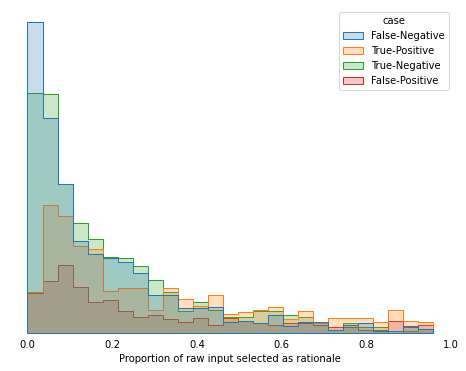

In [16]:
# look at grouped by case
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(data = rationales_df, x = "prop_chosen", hue = "case", element="step")

ax.set_xlabel("Proportion of raw input selected as rationale")
ax.set_yticklabels([])
ax.set_ylabel("")
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
    
# plt.savefig("./artifacts/RCNN_IB_GAN_be_mimic3_org_embs2021-05-12/prop_chosen_by_case.png")


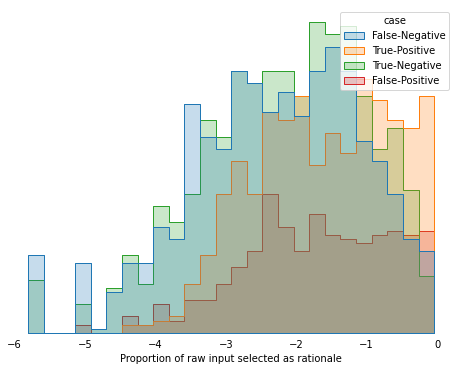

In [21]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(data = rationales_df, x = "log_prop_chosen", hue = "case", element="step")

ax.set_xlabel("Proportion of raw input selected as rationale")
ax.set_yticklabels([])
ax.set_ylabel("")
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

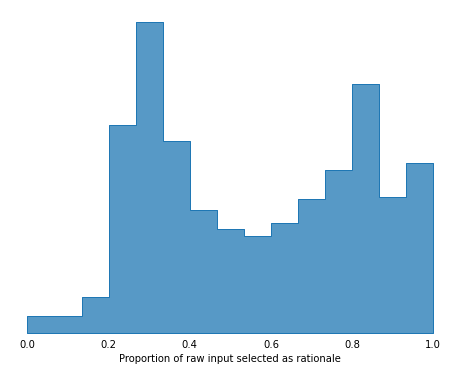

In [37]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(data = rationales_df, x = "prop_chosen_unknown", element="step")

ax.set_xlabel("Proportion of raw input selected as rationale")
ax.set_yticklabels([])
ax.set_ylabel("")
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

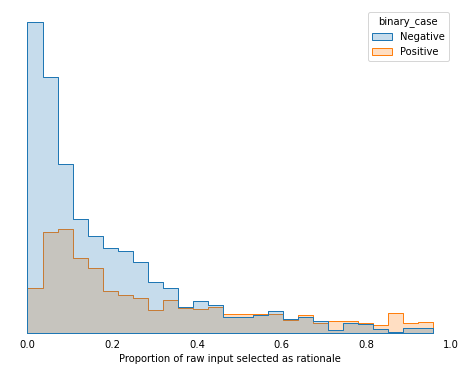

In [173]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(data = rationales_df, x = "prop_chosen", hue = "binary_case", element="step")

ax.set_xlabel("Proportion of raw input selected as rationale")
ax.set_yticklabels([])
ax.set_ylabel("")
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
    
plt.savefig("./artifacts/RCNN_IB_GAN_be_mimic3_org_embs2021-05-12/prop_chosen_by_binary_case.png")

In [ ]:
# look at grouped by case
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(data = rationales_df, x = "prop_chosen", hue = "case", element="step")

ax.set_xlabel("Proportion of raw input selected as rationale")

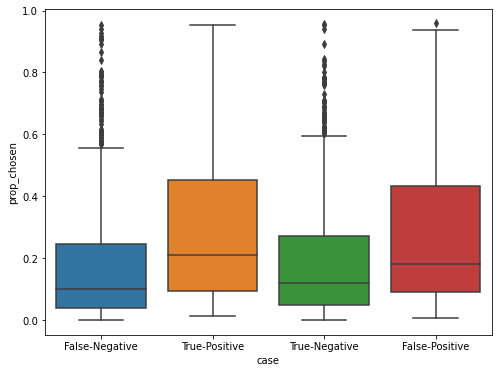

In [177]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = rationales_df, x = "case", y = "prop_chosen")
plt.savefig("./artifacts/RCNN_IB_GAN_be_mimic3_org_embs2021-05-12/mean_prop_chosen.png") 

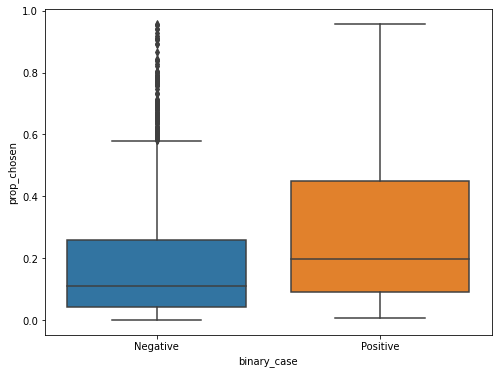

In [176]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = rationales_df, x = "binary_case", y = "prop_chosen")

In [109]:
min(len_raw)

11

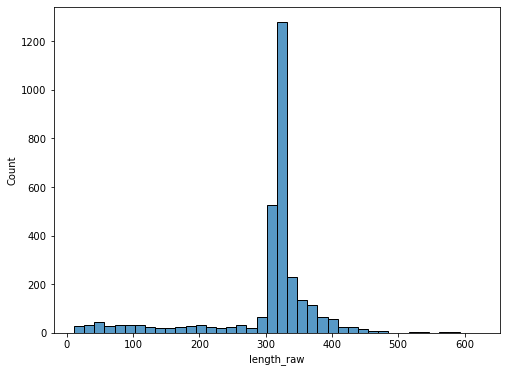

In [112]:
fig, ax = plt.subplots(figsize = (8,6))

# Plot
    # Plot histogram
# len_raw.plot(kind = "hist", density = True, alpha = 0.65, bins = 15) # change density to true, because KDE uses density
#     # Plot KDE
# len_raw.plot(kind = "kde")

sns.histplot(len_raw, bins = 40)

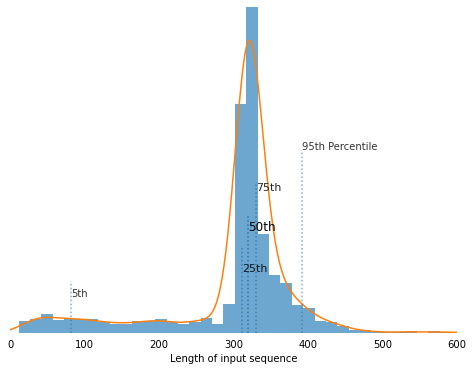

In [116]:
fig, ax = plt.subplots(figsize = (8,6))

# Plot
    # Plot histogram
len_raw.plot(kind = "hist", density = True, alpha = 0.65, bins = 40) # change density to true, because KDE uses density
    # Plot KDE
len_raw.plot(kind = "kde")

    # Quantile lines
quant_5, quant_25, quant_50, quant_75, quant_95 = len_raw.quantile(0.05), len_raw.quantile(0.25), len_raw.quantile(0.5), len_raw.quantile(0.75), len_raw.quantile(0.95)
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")


# X
ax.set_xlabel("Length of input sequence")
    # Limit x range to 0-4
x_start, x_end = 0, 600
ax.set_xlim(x_start, x_end)

# Y
ax.set_ylim(0, 0.016)
ax.set_yticklabels([])
ax.set_ylabel("")

# Annotations
ax.text(quant_5-0.05, 0.0018, "5th", size = 10, alpha = 0.8)
ax.text(quant_25-0.05, 0.003, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-0.05, 0.005, "50th", size = 12, alpha = 1)
ax.text(quant_75-0.05, 0.007, "75th", size = 11, alpha = 0.85)
ax.text(quant_95-0.1, 0.009, "95th Percentile", size = 10, alpha =.8)

# Overall
ax.grid(False)
# ax.set_title("MIMIC-III test data - lengths of raw sentence", size = 17, pad = 10)

    # Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
plt.savefig("./artifacts/RCNN_IB_GAN_be_mimic3_org_embs2021-05-12/length_test_raw.png") 
plt.show()

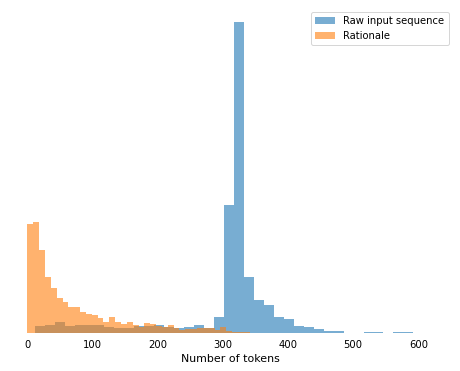

In [117]:
# plot histogram of lengths together
fig, ax = plt.subplots(figsize = (8,6))

plt.hist(len_raw, bins=40, alpha=0.6, label="Raw input sequence")
plt.hist(len_chosen, bins=40, alpha=0.6, label="Rationale")

ax.set_xlabel("Number of tokens", size=11)
ax.set_yticklabels([])
ax.set_ylabel("")
# ax.ylabel("Count", size=14)
ax.legend(loc='upper right')
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
# plt.title("Multiple Histograms with Matplotlib")

plt.savefig("./artifacts/RCNN_IB_GAN_be_mimic3_org_embs2021-05-12/overlapping_histograms_raw_chosen.png")

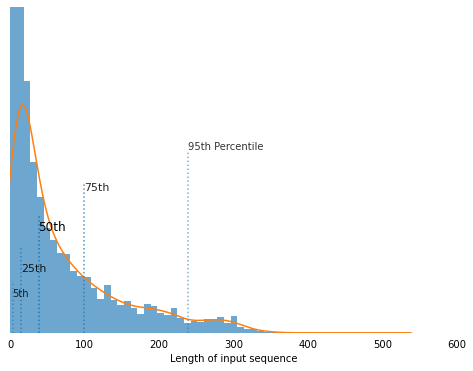

In [134]:
fig, ax = plt.subplots(figsize = (8,6))

# Plot
    # Plot histogram
len_chosen.plot(kind = "hist", density = True, alpha = 0.65, bins = 40) # change density to true, because KDE uses density
    # Plot KDE
len_chosen.plot(kind = "kde")

    # Quantile lines
quant_5, quant_25, quant_50, quant_75, quant_95 = len_chosen.quantile(0.05), len_chosen.quantile(0.25), len_chosen.quantile(0.5), len_chosen.quantile(0.75), len_chosen.quantile(0.95)
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")


# X
ax.set_xlabel("Length of input sequence")
    # Limit x range to 0-4
x_start, x_end = 0, 600
ax.set_xlim(x_start, x_end)

# Y
ax.set_ylim(0, 0.016)
ax.set_yticklabels([])
ax.set_ylabel("")

# Annotations
ax.text(quant_5-0.05, 0.0018, "5th", size = 10, alpha = 0.8)
ax.text(quant_25-0.05, 0.003, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-0.05, 0.005, "50th", size = 12, alpha = 1)
ax.text(quant_75-0.05, 0.007, "75th", size = 11, alpha = 0.85)
ax.text(quant_95-0.1, 0.009, "95th Percentile", size = 10, alpha =.8)

# Overall
ax.grid(False)
# ax.set_title("MIMIC-III test data - lengths of raw sentence", size = 17, pad = 10)

    # Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
plt.savefig("./artifacts/RCNN_IB_GAN_be_mimic3_org_embs2021-05-12/length_test_chosen.png")  
plt.show()

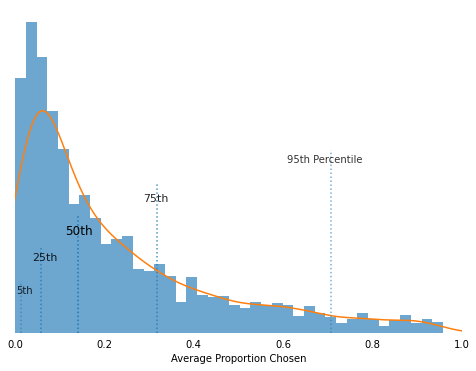

In [133]:
fig, ax = plt.subplots(figsize = (8,6))

# Plot
    # Plot histogram
prop_chosen.plot(kind = "hist", density = True, alpha = 0.65, bins = 40) # change density to true, because KDE uses density
    # Plot KDE
prop_chosen.plot(kind = "kde")

    # Quantile lines
quant_5, quant_25, quant_50, quant_75, quant_95 = prop_chosen.quantile(0.05), prop_chosen.quantile(0.25), prop_chosen.quantile(0.5), prop_chosen.quantile(0.75), prop_chosen.quantile(0.95)
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")


# X
ax.set_xlabel("Average Proportion Chosen")
    # Limit x range to 0-4
x_start, x_end = 0, 1
ax.set_xlim(x_start, x_end)

# Y
# ax.set_ylim(0, 1)
ax.set_yticklabels([])
ax.set_ylabel("")

# Annotations
ax.text(quant_5-0.01, 0.6, "5th", size = 10, alpha = 0.8)
ax.text(quant_25-0.02, 1.1, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-0.03, 1.5, "50th", size = 12, alpha = 1)
ax.text(quant_75-0.03, 2, "75th", size = 11, alpha = 0.85)
ax.text(quant_95-0.1, 2.6, "95th Percentile", size = 10, alpha =.8)

# Overall
ax.grid(False)
# ax.set_title("Rationales - Proportion of raw sentence", size = 17, pad = 10)

    # Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
plt.savefig("./artifacts/RCNN_IB_GAN_be_mimic3_org_embs2021-05-12/prop-chosen.png")  
plt.show()


In [12]:
min(rationales_df["prop_chosen"])

0.0

In [20]:
len(rationales_df[rationales_df["prop_chosen"]<0.5])

2664

In [16]:
len(rationales_df)

3063

# example sentence comparison with self-attention in BERT

In [22]:


example_sentence = "has experienced acute on chronic diastolic heart failure in the setting of volume overload due to his sepsis prescribed warfarin due to high sys blood pressure 160"

In [24]:
# load results from selector-predictor model
sp_results = pd.read_csv("./artifacts/RCNN_IB_GAN_be_mimic3_org_embs2021-05-12/test_sentence_chosen_words.csv", index_col = 0)
sp_results.head()


,raw_sentence,chosen_words,words_not_chosen,predicted_label,proba,enq_seq_chosen,enq_seq_not_chosen
0,"['has', 'experienced', 'acute', 'on', 'chronic...","['warfarin', 'to', 'pressure', 'UNK']","['has', 'experienced', 'acute', 'on', 'chronic...",0,0.462681,"[1204, 7, 158, 3]","[52, 2369, 87, 13, 162, 619, 114, 105, 12, 5, ..."


In [25]:
sp_results.dtypes

raw_sentence           object
chosen_words           object
words_not_chosen       object
predicted_label         int64
proba                 float64
enq_seq_chosen         object
enq_seq_not_chosen     object
dtype: object

In [26]:
# convert these weird strings of lists to lists
sp_results['raw_sentence'] = sp_results['raw_sentence'].apply(ast.literal_eval)
sp_results['chosen_words'] = sp_results['chosen_words'].apply(ast.literal_eval)
sp_results['words_not_chosen'] = sp_results['words_not_chosen'].apply(ast.literal_eval)
sp_results['enq_seq_chosen'] = sp_results['enq_seq_chosen'].apply(ast.literal_eval)
sp_results['enq_seq_not_chosen'] = sp_results['enq_seq_not_chosen'].apply(ast.literal_eval)

In [81]:
sp_results = sp_results.squeeze(axis=0)

print("Prediction: Not readmitted\n\nProbability of class prediction : ", round(sp_results["proba"],3) )
print("=======================================================================================================================")
sp_bool = print_formatted_words(sp_results['raw_sentence'], sp_results['chosen_words'])

Prediction: Not readmitted

Probability of class prediction :  0.463
Has experienced acute on chronic diastolic heart failure in the setting of volume overload due to his sepsis prescribed warfarin due to high sys blood pressure 160


In [30]:
# now get boolean version

sp_bool

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0]

In [136]:
from scipy import stats

chosen_stats = rationales_df[["prop_chosen","case"]]

In [141]:
chosen_stats.head()

,prop_chosen,case
0,0.095975,False-Negative
0,0.248062,False-Negative
0,0.233227,False-Negative
0,0.019608,False-Negative
0,0.127329,True-Positive


In [138]:
chosen_stats.groupby("case")["prop_chosen"].mean()

case
False-Negative    0.173483
False-Positive    0.281386
True-Negative     0.191119
True-Positive     0.299461
Name: prop_chosen, dtype: float64

In [139]:
chosen_stats.groupby("case")["prop_chosen"].count()

case
False-Negative     968
False-Positive     358
True-Negative     1008
True-Positive      729
Name: prop_chosen, dtype: int64

In [ ]:
pd.lreshape(data, groups, dropna=True, label=None)

In [146]:
>>> import random
>>> random.seed(0)
>>> data = [[random.randint(1, 20) for _ in range(size)] for size in range(1, 5)]
>>> for sample in data:
...     print(sample)

[13]
[14, 2]
[9, 17, 16]
[13, 10, 16, 12]


In [152]:
tp_chosen = chosen_stats[chosen_stats["case"] =="True-Positive"]["prop_chosen"]
fp_chosen = chosen_stats[chosen_stats["case"] =="False-Positive"]["prop_chosen"]
tn_chosen = chosen_stats[chosen_stats["case"] =="True-Negative"]["prop_chosen"]
fn_chosen = chosen_stats[chosen_stats["case"]=="False-Negative"]["prop_chosen"]

# add all to list

data = [tp_chosen,fp_chosen,tn_chosen,fn_chosen]

In [165]:
p_chosen = chosen_stats[(chosen_stats["case"] =="True-Positive") | (chosen_stats["case"] =="False-Positive")]["prop_chosen"]
f_chosen = chosen_stats[(chosen_stats["case"] =="True-Negative") | (chosen_stats["case"] =="False-Negative")]["prop_chosen"]

In [156]:
f_val, p_val = stats.f_oneway(*data)

p_val

1.2379203195249308e-40

In [166]:
data2 = [p_chosen,f_chosen]
f_val, p_val = stats.f_oneway(*data2)

p_val

8.10036050224315e-42